# TIMAEUS

## What is in this Document

A number of simulated results from a cross section of various satellite systems.

## Importing a .orb File

A *.orb* file contains information on the connectivity between systems of bodies. This information is more useful a *.csv*, so we want to be able to perform the necessary conversion. (This code is necessary to run all other examples in this Notebook, as it includes the necessary imports, as well as the file path for all examples).

In [1]:
import Interval_Matrix_Algebra_Calculator_v0 as imac
import os
import interval_distance_functions as idf
import contact_analysis as ca

#filename = "outputs/moongnd-8/moongnd_1 Contact Analysis.csv"
#filename = "outputs/moongnd-8/moongnd_2 Contact Analysis.csv"
filename = "outputs/moongnd-8/moongnd_3 Contact Analysis.csv"

file = os.path.join(os.getcwd(), filename)
A = imac.soapConverter(file)


## 3D Depiction of a TVG-Matrix

Our TVG matrix is represented in code as a *.csv*. We can take this information and represent it visually.

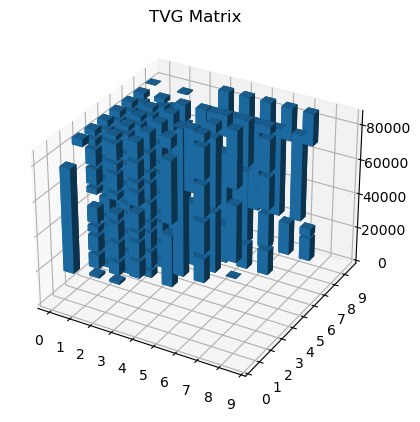

0

In [2]:
A = imac.soapConverter(file)

imac.connection_barcode_3d_inline(imac.remove_diagonal(A))
#imac.cb3d(imac.remove_diagonal(A), "Matrix with Labels", path="", labels=True)

## Computing the K-walks of a System

Which bodies can a node talk by relaying a message through k nodes? Computation of these k-walks is simple, and can also be depicted visually.

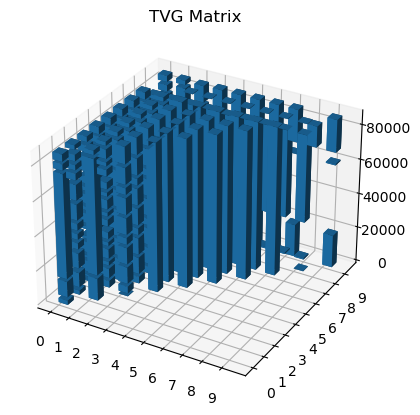

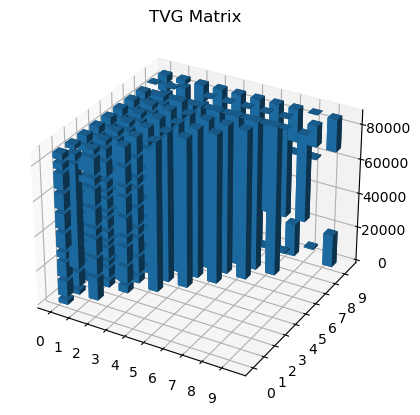

0

In [3]:
A = imac.soapConverter(file)
A_2 = imac.matrix_nontrivial_k_walk(A, 2)
A_3 = imac.matrix_nontrivial_k_walk(A, 3)
imac.connection_barcode_3d_inline(A_2)
imac.connection_barcode_3d_inline(A_3)

## The Kleene-* of a System

It is also useful to compute the Kleene Star of a given system of bodies. This captures the total of connectivity of a system, regardless of the number of relays. In other words, it is the sum of all k-walks, for $ k \ge 1 $.

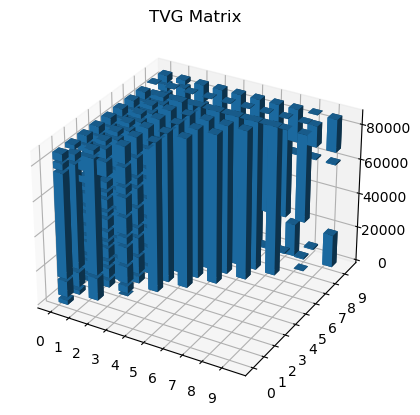

0

In [4]:
A = imac.remove_diagonal(imac.soapConverter(file))

A_star = imac.A_star(A)
imac.connection_barcode_3d_inline(A_star)

## The Hausdorff Distance of K-Walks

We want to be able to find the Hausdorff distance between a k-walk and a j-walk. In our current system sampling, we are looking at intervals of a day measured in seconds.

This code will run the componentwise Hausdorff distance between $ A $ and $ A^2 $, and output the max of these across all components. Large distances will be in the hundreds of thousands of seconds.

In [5]:
A = imac.soapConverter(file)
A_2 = imac.matrix_nontrivial_k_walk(A, 2)

distance = idf.matrix_TVG_distance(A, A_2, idf.l_infinity, idf.h_distance)
print(distance)

33570.333


### The Hausdorff Distance on the Sequence of K-Walk Matrices

What is the long-term trend of the distance between an n-walk matrix and an (n+1)-walk matrix? This is equivalent to graphing the sequence $a_n = d_H(A^n, A^{n+1})$. To do this, we will collect the k-walks of a matrix, compute the distances, and graph them:

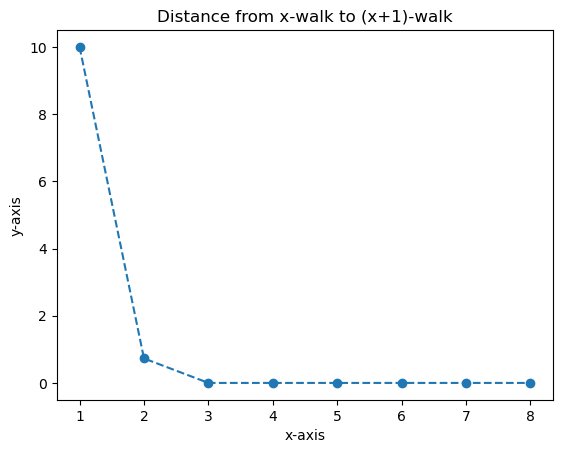

In [6]:
import matplotlib.pyplot as plt

A = imac.soapConverter(file)

rnge = 10
k_walks = []
for j in range(1, rnge):
    k_walks.append(imac.matrix_k_walk(A,j))
dx = []
for i in range(len(k_walks)-1):
    dx.append(idf.matrix_TVG_distance(k_walks[i], k_walks[i+1], idf.l_1, idf.h_distance))
dx = [e*10/max(dx) for e in dx]
plt.plot(range(1,rnge-1),dx, linestyle='dashed', marker='o')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Distance from x-walk to (x+1)-walk")
plt.show()

The distance quickly converges, leaving a tail close to (if not) zero! Graphing the distances without $ a_1 $ reveals the near-zero behavior: 

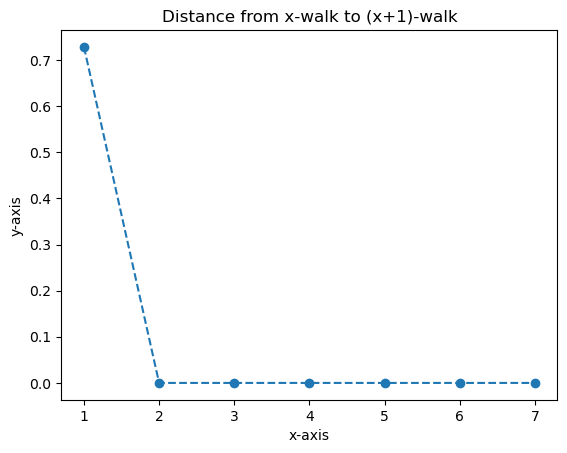

In [7]:
import matplotlib.pyplot as plt

A = imac.soapConverter(file)

rnge = 10
k_walks = []
for j in range(1, rnge):
    k_walks.append(imac.matrix_k_walk(A,j))
dx = []
for i in range(len(k_walks)-1):
    dx.append(idf.matrix_TVG_distance(k_walks[i], k_walks[i+1], idf.l_1, idf.h_distance))
dx = [e*10/max(dx) for e in dx]
dx.pop(0)

plt.plot(range(1,rnge-2),dx, linestyle='dashed', marker='o')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Distance from x-walk to (x+1)-walk")
plt.show()

## Zig-Zag Persistence

In [8]:
import dionysus as d
import contact_analysis as ca
from zz_persistence import *

contact_plan = ca.contact_analysis_parser(filename)

graph = ca.construct_graph(contact_plan)
weighted_simplex = ca.construct_weighted_simplex(graph)
zz, dgms, cells = calculate_zz_persistence(weighted_simplex)

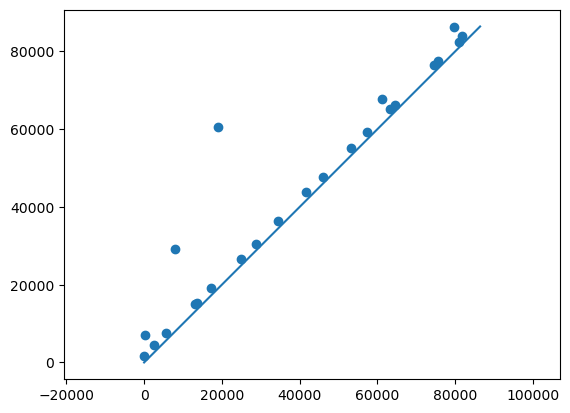

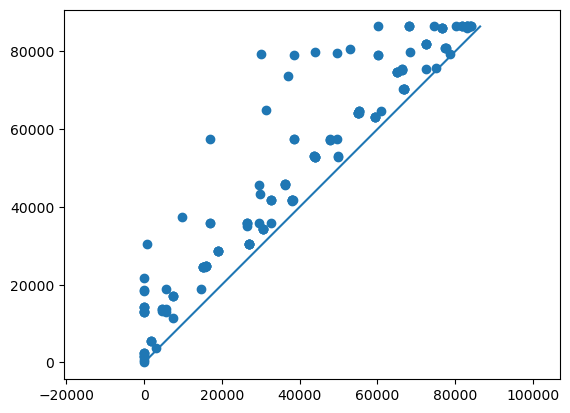

In [9]:
# for i,dgm in enumerate(dgms):
#     print("Dimension:", i)
#     for p in dgm:
#         print(p)
d.plot.plot_diagram(dgms[0], show = True)
d.plot.plot_diagram(dgms[1], show = True)

In [10]:
import portion as P


def matrix_to_weighted_simplex(A):
    simplex = []
    times = []

    for i in range(len(A)):
        simplex.append([i])
        times.append([0])

    for i in range(len(A)):
        for j in range(i  + 1, len(A)):
            simplex.append([i, j])
            # print("A[{}][{}] = {}".format(i, j, A[i][j]))
            edge_times = []
            for k in idf.get_endpoints(P.to_data(A[i][j])):
                edge_times.append(k)
                # print(k)
            times.append(edge_times)

    return {"simplex" : simplex, "times" : times}

Bottleneck distance between 1-dimensional persistence diagrams: 38743.21875
Bottleneck distance between 1-dimensional persistence diagrams: 5771.75390625
Bottleneck distance between 1-dimensional persistence diagrams: 11.931232452392578
Bottleneck distance between 1-dimensional persistence diagrams: 0.0
Bottleneck distance between 1-dimensional persistence diagrams: 0.0
Bottleneck distance between 1-dimensional persistence diagrams: 0.0
Bottleneck distance between 1-dimensional persistence diagrams: 0.0
Bottleneck distance between 1-dimensional persistence diagrams: 0.0
Bottleneck distance between 1-dimensional persistence diagrams: 0.0
Bottleneck distance between 1-dimensional persistence diagrams: 0.0
Bottleneck distance between 1-dimensional persistence diagrams: 0.0
Bottleneck distance between 1-dimensional persistence diagrams: 0.0
Bottleneck distance between 1-dimensional persistence diagrams: 0.0
Bottleneck distance between 1-dimensional persistence diagrams: 0.0
Bottleneck dist

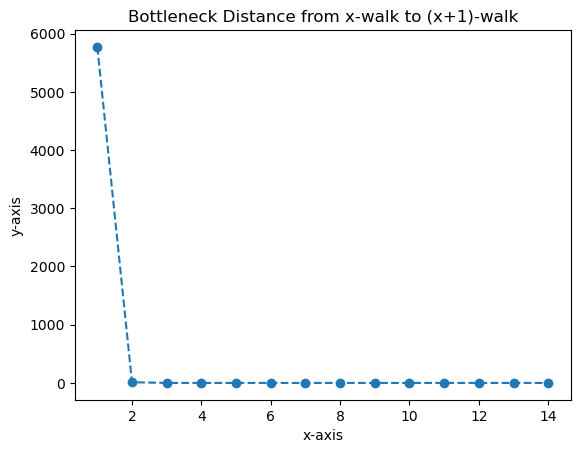

In [11]:
rnge = 17
dim = 1
k_walks = []
for j in range(1, rnge):
    k_walks.append(imac.matrix_k_walk(A,j))
dx = []
for i in range(len(k_walks)-1):
    weighted_simplex_A = matrix_to_weighted_simplex(k_walks[i])
    zzA, dgmsA, cellsA = calculate_zz_persistence(weighted_simplex_A)
    weighted_simplex_B = matrix_to_weighted_simplex(k_walks[i+1])
    zzB, dgmsB, cellsB = calculate_zz_persistence(weighted_simplex_B)
    
#     wdist = d.wasserstein_distance(dgmsA[dim], dgmsB[dim], q=2)
#     print("2-Wasserstein distance between {}-dimensional persistence diagrams: {}".format(dim, wdist))
#     dx.append(wdist)

    bdist = d.bottleneck_distance(dgmsA[dim], dgmsB[dim])
    print("Bottleneck distance between {}-dimensional persistence diagrams: {}".format(dim, bdist))
    dx.append(bdist)

# dx = [e*10/max(dx) for e in dx]
dx.pop(0)

plt.plot(range(1,rnge-2),dx, linestyle='dashed', marker='o')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Bottleneck Distance from x-walk to (x+1)-walk")
plt.show()